In [1]:
from grale.all_nb import *

Set 'threads' as default renderer for lensplane and mass density
Set default angular unit in plotting to arcsec
Set feedback style to 'notebook'


In [2]:
cosm = cosmology.Cosmology(0.7, 0.3, 0, 0.7)
cosmology.setDefaultCosmology(cosm)
D = cosm.getAngularDiameterDistance

In [5]:
zd = 0.4

trueLens = lenses.GravitationalLens.load("truelens.lensdata")
sol = lenses.GravitationalLens.load("solution.lensdata")

liTrue = plotutil.LensInfo(trueLens, size=80*ANGLE_ARCSEC, zd=zd, zs=2)
liSol = plotutil.LensInfo(sol, size=80*ANGLE_ARCSEC, zd=zd, zs=2)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

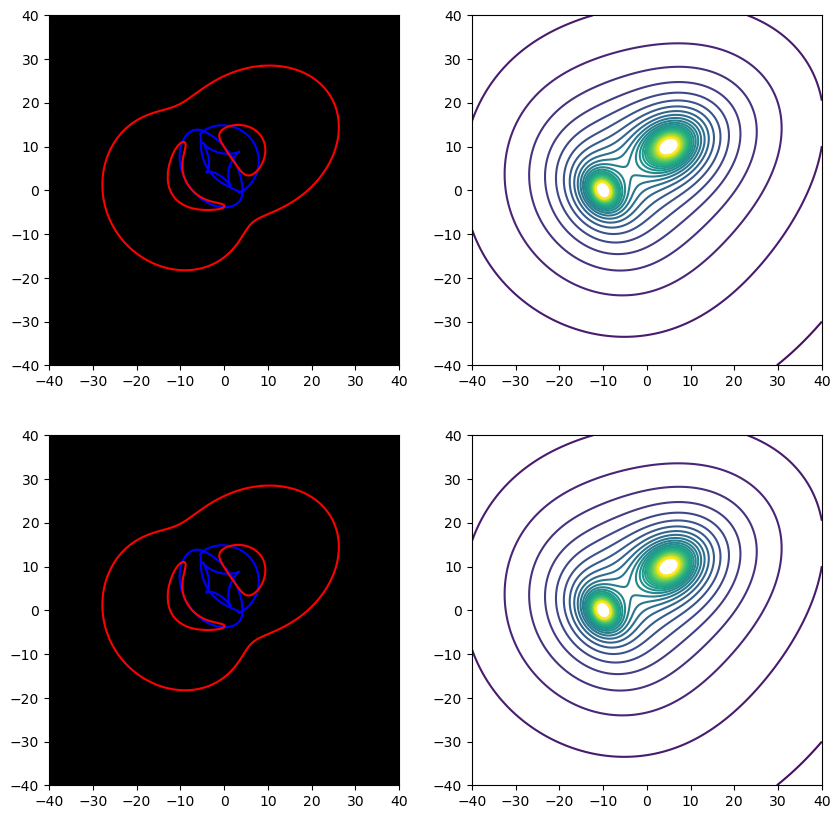

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plotutil.plotImagePlane(liTrue)
plt.subplot(2,2,2)
plotutil.plotDensityContours(liTrue, levels=np.arange(0.5, 15, 0.5))
plt.subplot(2,2,3)
plotutil.plotImagePlane(liSol)
plt.subplot(2,2,4)
plotutil.plotDensityContours(liSol, levels=np.arange(0.5, 15, 0.5))


In [7]:
import pickle
imgList = pickle.load(open("imglist.pickle", "rb"))

iws = inversion.InversionWorkSpace(zd, 80*ANGLE_ARCSEC)
for i in imgList:
    iws.addImageDataToList(i["imgdata"], i["z"], "pointimages")

/home/jori/mambaforge-202302/envs/grale2ga3/lib/python3.12/site-packages/grale/plotutil.py:2113: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  p = axes.plot(x, y, ".-", **kwargs)


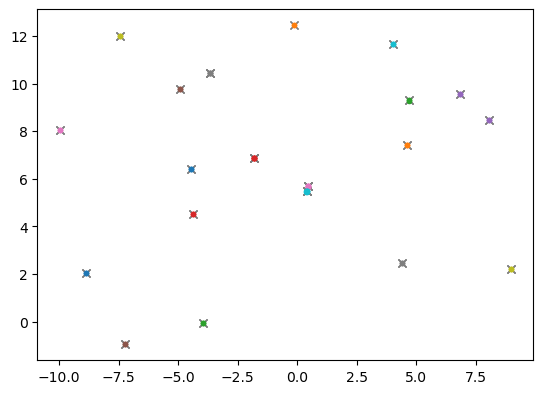

In [8]:
plotutil.plotImagesData(iws.backProject(trueLens), imagePlotOptionsFunction=lambda src, img: { "marker": "x", "color": "gray"})
plotutil.plotImagesData(iws.backProject(sol))
plt.gca().set_aspect("equal")

In [9]:
trueLens.getLensParameters()[0]["lens"].getLensParameters()

{'velocityDispersion': 700000.0,
 'ellipticity': 0.8,
 'coreRadius': 2.42406840554768e-06}

In [10]:
sol.getLensParameters()[0]["lens"].getLensParameters()

{'velocityDispersion': 700115.6330108643,
 'ellipticity': 0.8000859618186951,
 'coreRadius': 2.425211131343301e-06}